In [15]:
# Using the recent historical data to make a linear regression prediction for the near future.
# use the sample method here for a very different dataset predicting weather not climate: 
# https://stackabuse.com/using-machine-learning-to-predict-the-weather-part-2/

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [17]:
# years I plan to predict
years_predict = np.arange(2016, 2026, 1)
X_predict_20 = pd.DataFrame()
X_predict_20['Years Predicted'] = np.arange(2016, 2026, 1)
X_predict_100 = pd.DataFrame()
X_predict_100['Years Predicted'] = np.arange(2016, 2026, 1)

In [18]:
# load the pre cleaned data from GreenhouseGassesDataCleaning.ipynb
dataset = pd.read_csv('dataset_interpolated.csv').set_index('Year (negative values = BC)')
dataset.tail()

,Temp interpolated,CO2 interpolated,N2O interpolated,Methane interpolated
Year (negative values = BC),,,,
2011,2.75,390.577083,324.046000,1787.139584
2012,2.80,392.596875,324.971271,1791.995417
2013,2.84,395.390833,325.869500,1798.335834
2014,2.92,397.355417,327.181667,1808.427500
2015,3.08,400.830000,328.181111,1819.157500


In [19]:
recent = dataset.drop(dataset[dataset.index < 1915].index)
recent.head()

,Temp interpolated,CO2 interpolated,N2O interpolated,Methane interpolated
Year (negative values = BC),,,,
1915,2.11,301.00,280.535294,924.366667
1916,1.89,301.44,280.688235,927.133333
1917,1.87,301.88,280.841176,929.900000
1918,1.98,302.32,280.994118,936.583333
1919,1.98,302.76,281.147059,943.266667


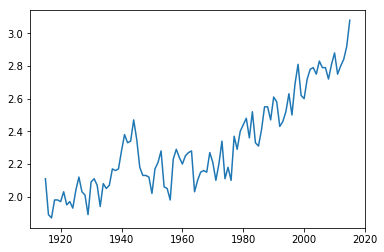

In [20]:
plt.plot(recent['Temp interpolated'])

In [21]:
last_20 = dataset.drop(dataset[dataset.index < 1996].index)
year = recent.index
last_20

,Temp interpolated,CO2 interpolated,N2O interpolated,Methane interpolated
Year (negative values = BC),,,,
1996,2.50,362.007857,311.703250,1756.816667
1997,2.69,363.192976,312.642750,1762.796111
1998,2.81,365.803452,313.101417,1770.535278
1999,2.62,367.897738,314.508458,1777.128611
2000,2.60,369.159405,315.457083,1776.830833
2001,2.72,370.265694,316.248583,1778.781944
2002,2.78,372.165442,316.639972,1755.462083
2003,2.79,374.598333,317.577958,1760.608750
2004,2.75,376.354833,318.271479,1759.310833


In [22]:
# plot the feature data and the best fit lines for the recent data and just the last 20 years of data.  
# The slopes of those lines will be used to predict the new temperatures

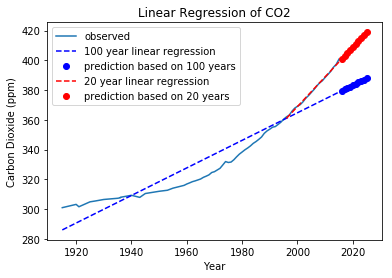

In [61]:
plt.plot(recent['CO2 interpolated'], label='observed')
slope, intercept, r_value, p_value, std_err = linregress(year, recent['CO2 interpolated'])
fit = slope * year + intercept
plt.plot(year, fit, 'b--', label='100 year linear regression')
X_predict_100['CO2 interpolated'] = slope * years_predict + intercept
plt.plot(years_predict, X_predict_100['CO2 interpolated'], 'bo', label='prediction based on 100 years')
slope, intercept, r_value, p_value, std_err = linregress(last_20.index, last_20['CO2 interpolated'])
fit = slope * last_20.index + intercept
plt.plot(last_20.index, fit, 'r--', label='20 year linear regression')
X_predict_20['CO2 interpolated'] = slope * years_predict + intercept
plt.plot(years_predict, X_predict_20['CO2 interpolated'], 'ro', label='prediction based on 20 years')
plt.xlabel('Year')
plt.ylabel('Carbon Dioxide (ppm)')
plt.title('Linear Regression of CO2')
plt.legend()
plt.savefig('future_prediction_co2.png')

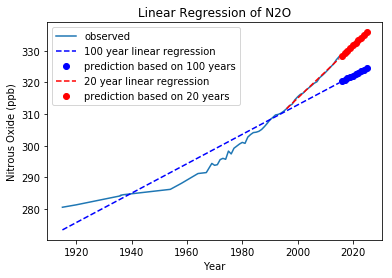

In [62]:
plt.plot(recent['N2O interpolated'], label='observed')
slope, intercept, r_value, p_value, std_err = linregress(year, recent['N2O interpolated'])
fit = slope * year + intercept
plt.plot(year, fit, 'b--', label='100 year linear regression')
X_predict_100['N2O interpolated'] = slope * years_predict + intercept
plt.plot(years_predict, X_predict_100['N2O interpolated'], 'bo', label='prediction based on 100 years')
slope, intercept, r_value, p_value, std_err = linregress(last_20.index, last_20['N2O interpolated'])
fit = slope * last_20.index + intercept
plt.plot(last_20.index, fit, 'r--', label='20 year linear regression')
X_predict_20['N2O interpolated'] = slope * years_predict + intercept
plt.plot(years_predict, X_predict_20['N2O interpolated'], 'ro', label='prediction based on 20 years')
plt.xlabel('Year')
plt.ylabel('Nitrous Oxide (ppb)')
plt.title('Linear Regression of N2O')
plt.legend()
plt.savefig('future_prediction_n20.png')

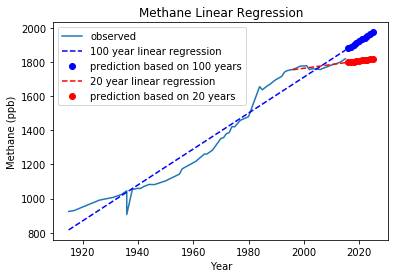

In [59]:
plt.plot(recent['Methane interpolated'], label='observed')
slope, intercept, r_value, p_value, std_err = linregress(year, recent['Methane interpolated'])
fit = slope * year + intercept
plt.plot(year, fit, 'b--', label='100 year linear regression')
X_predict_100['Methane interpolated'] = slope * years_predict + intercept
plt.plot(years_predict, X_predict_100['Methane interpolated'], 'bo', label='prediction based on 100 years')
slope, intercept, r_value, p_value, std_err = linregress(last_20.index, last_20['Methane interpolated'])
fit = slope * last_20.index + intercept
plt.plot(last_20.index, fit, 'r--', label='20 year linear regression')
X_predict_20['Methane interpolated'] = slope * years_predict + intercept
plt.plot(years_predict, X_predict_20['Methane interpolated'], 'ro', label='prediction based on 20 years')
plt.xlabel('Year')
plt.ylabel('Methane (ppb)')
plt.title('Methane Linear Regression')
plt.legend()
plt.savefig('future_prediction_methane.png')

In [26]:
X_predict_20.to_csv('predicted_greenhouse_20.csv')
X_predict_100.to_csv('predicted_greenhouse_100.csv')

In [27]:
# check the correlation between the features and the Temperature.  
# The CO2 is the most correlated by far and the N2O is the least immportant
recent.corr()[['Temp interpolated']].sort_values('Temp interpolated')

,Temp interpolated
Methane interpolated,0.881664
N2O interpolated,0.926018
CO2 interpolated,0.927857
Temp interpolated,1.000000


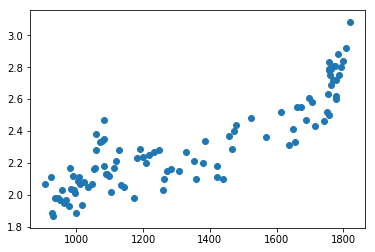

In [28]:
plt.scatter(recent['Methane interpolated'], recent['Temp interpolated'])

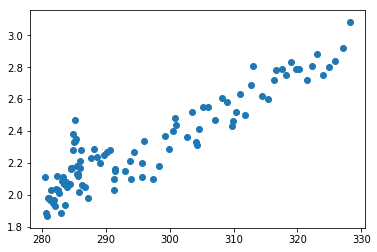

In [29]:
plt.scatter(recent['N2O interpolated'], recent['Temp interpolated'])

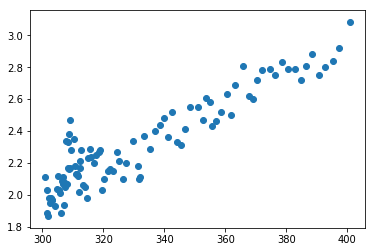

In [30]:
plt.scatter(recent['CO2 interpolated'], recent['Temp interpolated'])

In [31]:
# eh, most of the data is linear with a generally uniform distribution

In [32]:
# train, test, split the data
y = recent["Temp interpolated"].values.reshape(-1, 1)
X = recent.drop("Temp interpolated", axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)

In [33]:
# scale the data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)


X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_scaled = X_scaler.transform(X)


In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()  
lr.fit(X_train_scaled, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
score = lr.score(X_test_scaled, y_test)
print(f"R2 Score: {score}")

R2 Score: 0.8012490140647103


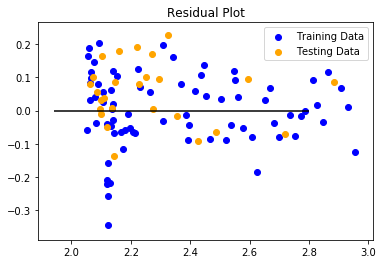

In [36]:
plt.scatter(lr.predict(X_train_scaled), lr.predict(X_train_scaled) - y_train, c="blue", label="Training Data")
plt.scatter(lr.predict(X_test_scaled), lr.predict(X_test_scaled) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [37]:
from sklearn.metrics import mean_squared_error

predictions = lr.predict(X_test_scaled)
MSE = mean_squared_error(y_test, predictions)
r2 = lr.score(X_test_scaled, y_test)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.011015420583062372, R2: 0.8012490140647103


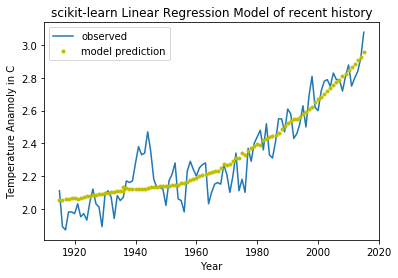

In [56]:
plt.plot(X.index, y, label='observed')
plt.plot(X.index, lr.predict(X_scaled), 'y.', label='model prediction')
plt.xlabel('Year')
plt.ylabel('Temperature Anamoly in C')
plt.title('scikit-learn Linear Regression Model of recent history')
plt.legend()
plt.savefig('scikit-learn linear regression.png')

In [39]:
#To retrieve the intercept:
print(lr.intercept_)
#For retrieving the slope:
print(lr.coef_)

[2.35342105]
[[ 0.11346137  0.20022167 -0.0443545 ]]


In [40]:
# now for the final results!!

In [41]:
X_predict_100.set_index('Years Predicted', inplace = True)
X_predict_20.set_index('Years Predicted', inplace = True)

In [42]:
X_predict_100_scaled = X_scaler.transform(X_predict_100)
X_predict_20_scaled = X_scaler.transform(X_predict_20)

In [43]:
predictions_100 = lr.predict(X_predict_100_scaled)
predictions_20 = lr.predict(X_predict_20_scaled)

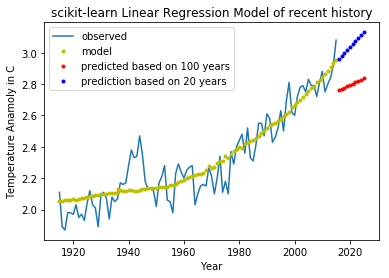

In [58]:
plt.plot(recent['Temp interpolated'], label='observed')
plt.plot(X.index, lr.predict(X_scaled), 'y.', label='model')
plt.plot(X_predict_100.index, lr.predict(X_predict_100_scaled), 'r.', label='predicted based on 100 years')
plt.plot(X_predict_20.index, lr.predict(X_predict_20_scaled), 'b.', label='prediction based on 20 years')
plt.xlabel('Year')
plt.ylabel('Temperature Anamoly in C')
plt.title('scikit-learn Linear Regression Model of recent history')
plt.legend()
plt.savefig('linear regression prediction.png')

In [46]:
X_predict_100[['CO2 interpolated','N2O interpolated','Methane interpolated']]

,CO2 interpolated,N2O interpolated,Methane interpolated
Years Predicted,,,
2016,379.623373,320.337978,1879.772804
2017,380.550049,320.803062,1890.303648
2018,381.476726,321.268147,1900.834493
2019,382.403402,321.733231,1911.365337
2020,383.330078,322.198315,1921.896181
2021,384.256755,322.663400,1932.427026
2022,385.183431,323.128484,1942.957870
2023,386.110107,323.593568,1953.488714
2024,387.036784,324.058652,1964.019559


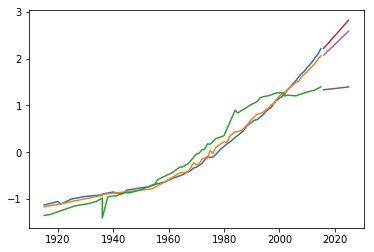

In [47]:
plt.plot(X.index, X_scaled)
plt.plot(X_predict_20.index, X_predict_20_scaled)